In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#tau is the length of the time-series
#n is the number of simulations for each rho
#n_rho is the number of rho

tau,n,n_rho = 1000,100,10


#sigma is the standard deviation of the normal associated to espilon
sigma = 1.

In [3]:
#AR parameters

rho = np.linspace(0, 1., n_rho) #We can define an array of values for rho 


In [4]:
#We initialize esplion with normals

epsilon = np.random.normal(0,sigma,size=(tau,n,n_rho)) 

#Tensor will speed up everything
#The first axis is the time, second axis refers to differnt realizzations the third axis to different rhos

In [5]:
#X cannot be vectorialized because it is recursive on X
#But we can preinitialize it

X = np.zeros((tau, n, n_rho)) 

In [6]:
#However we can vectorize the part of the different realizations and different rhos. 
#Remember that X is a tensor, and X[t] is a matrix (list esplilon), while rho is a vector

for t in range(1,tau):
    X[t] = rho * X[t-1] +  epsilon[t-1] 

In [7]:
#Let us check some AR process

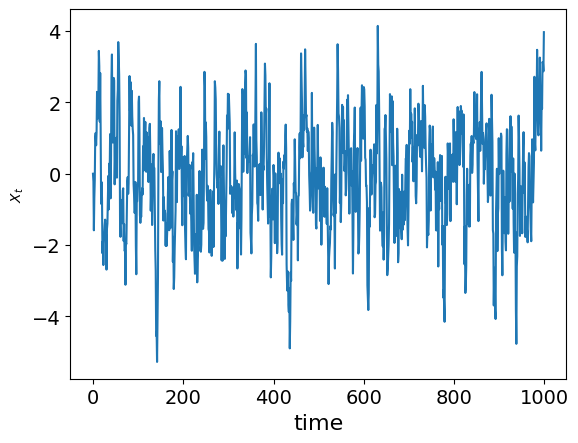

In [8]:
# First realization of the 8th rho

plt.plot(X[:,0,7])
plt.xlabel('time',fontsize=16)
plt.ylabel('$X_t$')
plt.tick_params(labelsize=14)

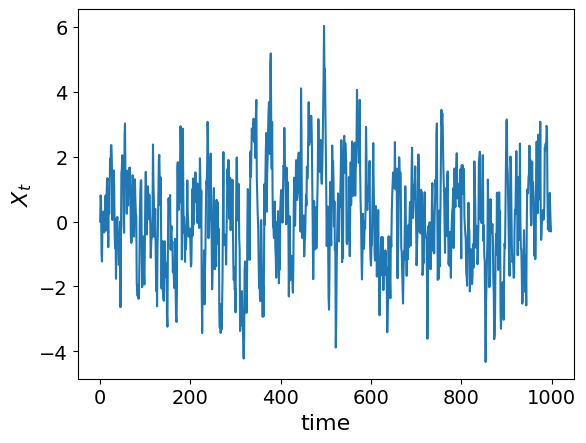

In [9]:
# Second realization of the 8th rho

plt.plot(X[:,1,7])
plt.xlabel('time',fontsize=16)
plt.ylabel('$X_t$',fontsize=16)
plt.tick_params(labelsize=14)

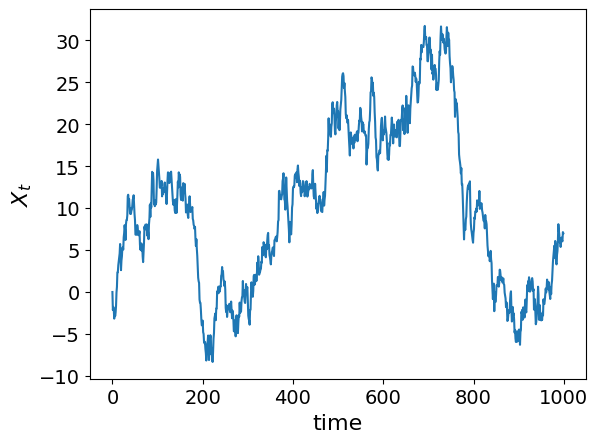

In [10]:
# Second realization of the last rho

plt.plot(X[:,1,9])
plt.xlabel('time',fontsize=16)
plt.ylabel('$X_t$',fontsize=16)
plt.tick_params(labelsize=14)

In [11]:
#We can extract the index where the sign of X[t] is different from X[1] (Note that X[0]=0)
idx = np.where(np.sign(X[1]) != np.sign(X[1:]))

In [12]:
#These are the tensor indices where the condition is true.
#The temporal index is the first.
#The index of the realization is the second
#The index of the row is the third
idx

(array([  1,   1,   1, ..., 998, 998, 998], dtype=int64),
 array([ 0,  0,  0, ..., 99, 99, 99], dtype=int64),
 array([0, 1, 2, ..., 0, 1, 3], dtype=int64))

In [13]:
#We need to take the minimal value on idx[0] for each pair of idx[1],idx[2]
#Working with pandas might be easier for the function groupby

all_opposite_sign =  pd.DataFrame(zip(idx[0],idx[1],idx[2]),
                                  columns=['change_sign_time','realizzation_index','rho_index'])

In [14]:
all_opposite_sign

,change_sign_time,realizzation_index,rho_index
0,1,0,0
1,1,0,1
2,1,0,2
3,1,0,3
4,1,0,9
...,...,...,...
497297,998,98,6
497298,998,98,7
497299,998,99,0
497300,998,99,1


In [15]:
#You can groupby coloumn 1 and 2 and take the mean. 

all_opposite_sign.groupby(['realizzation_index','rho_index']).min()

change_sign_time
realizzation_index rho_index                  
0                  0                         1
                   1                         1
                   2                         1
                   3                         1
                   4                         4
...                                        ...
99                 5                         7
                   6                         4
                   7                         3
                   8                         1
                   9                         3

[992 rows x 1 columns]

In [16]:
#If you reset the index you will obtain again on a more simple dataframe (no multi-index) 
first_sign_change = all_opposite_sign.groupby(['realizzation_index','rho_index']).min().reset_index()

In [17]:
first_sign_change 

,realizzation_index,rho_index,change_sign_time
0,0,0,1
1,0,1,1
2,0,2,1
3,0,3,1
4,0,4,4
...,...,...,...
987,99,5,7
988,99,6,4
989,99,7,3
990,99,8,1


In [18]:
# We initializie the stopping time as a matrix n x n_rho with all infinity value

stopping_time = np.full((n,n_rho),np.inf)

In [19]:
# We assign the actual stopping time measured in our simultions

stopping_time[ first_sign_change['realizzation_index'],
               first_sign_change['rho_index']] = first_sign_change['change_sign_time']

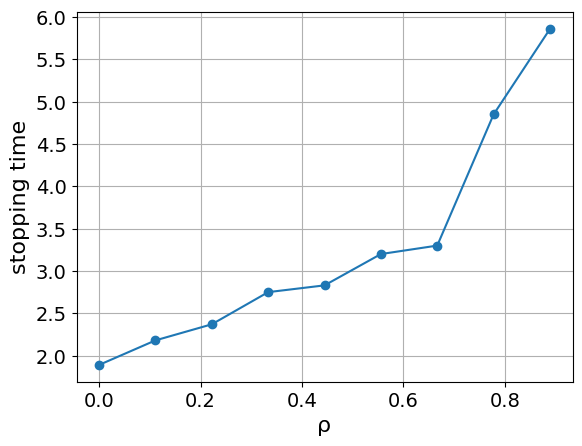

In [20]:
# We average the stopping times over the n simulations

plt.plot(rho,stopping_time.mean(axis=0),'-o')
plt.xlabel('ρ',fontsize=16)
plt.ylabel('stopping time',fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()
plt.show()

In [21]:
#Note that the last element is not plotted but there are some cases where the process did not change sign
stopping_time.mean(axis=0)

array([1.89, 2.18, 2.37, 2.75, 2.83, 3.2 , 3.3 , 4.85, 5.86,  inf])

In [22]:
stopping_time[:,-1]

array([  1.,   9.,  10.,   1.,   7.,  13.,   1., 168.,  90.,  inf,   1.,
         1.,  13.,   1., 194.,   1.,   3.,   6.,   4.,  99.,  90.,  17.,
        33., 192.,  11.,   6., 147.,  39.,   1.,   1.,   1.,  inf,  57.,
         4.,   1.,  18.,  inf, 136.,   2.,   2.,   1.,   8.,   6.,  16.,
         2.,   1.,   9.,   1.,   6.,   1.,   1.,  inf,   4.,   1.,   1.,
         9.,   2.,   1.,  16.,  17., 253.,  17.,   5.,   1., 284.,  11.,
         5.,   1.,   8.,   1.,   2.,  25.,   2.,   2.,  48.,  inf,   4.,
         3.,   1.,   4.,   3.,   2.,   1.,   7.,  14.,  inf,  inf,   4.,
        48., 221.,  inf,   1., 168.,   1.,  22.,   4.,   1.,   8.,   1.,
         3.])